# Steps of clustering research

# pca
#https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [4]:
#enable autocomplete
%config IPCompleter.greedy=True 

#load packages
import sys #access to system parameters
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

iris = datasets.load_iris()
x = iris.data
y = iris.target

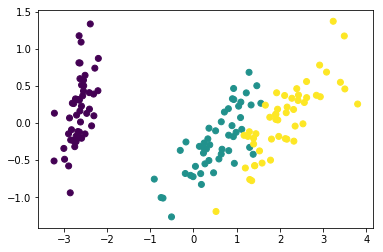

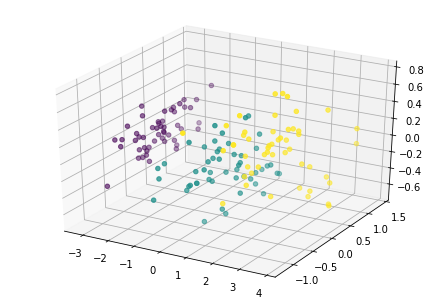

In [5]:
#https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(x)  
x_pca = pca.transform(x)

#2D plot
plt.scatter(x_pca[:,0],x_pca[:,1],c=y)
plt.show()

pca = PCA(n_components=3)
pca.fit(x)  
x_pca = pca.transform(x)

#https://stackoverflow.com/questions/1985856/how-to-make-a-3d-scatter-plot-in-python
#3D plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x_pca[:,0],x_pca[:,1],x_pca[:,2],c=y)
plt.show()

# Clustering

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

## Clustering - KMeans as Supervised

In [19]:
#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3).fit(x_train)

kmeans.labels_

y_pred_test = kmeans.predict(x_test)

kmeans.cluster_centers_

from sklearn.metrics import f1_score

f1_score(y_test, y_pred_test,average='weighted')



0.3682539682539682

## Clustering - KMeans as Un-Supervised

In [24]:

kmeans = KMeans(n_clusters=3).fit(x)
y_pred = kmeans.labels_
cluster_center = kmeans.cluster_centers_


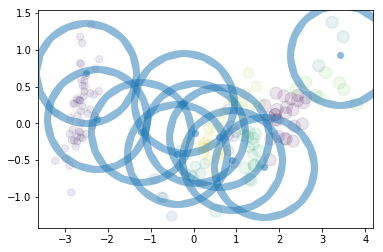

C:\Users\zigi\Anaconda3\lib\site-packages\matplotlib\collections.py:874: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


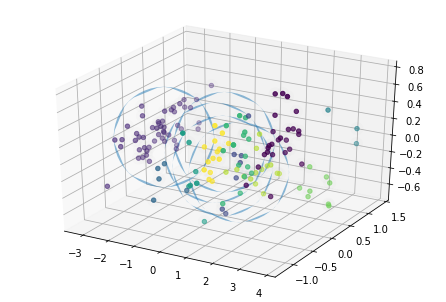

In [78]:
#check result using PCA

pca = PCA(n_components=3)
pca.fit(x)  
x_pca = pca.transform(x)

pca_cluster_center = PCA(n_components=2)
pca_cluster_center.fit(cluster_center)  
pca_cluster_center = pca_cluster_center.transform(cluster_center)

size_y = (y + 1)*50

#2D plot
plt.scatter(x_pca[:,0],x_pca[:,1],c=y_pred,s = size_y,alpha=0.1)
plt.scatter(x_pca[:,0],x_pca[:,1],c=y,alpha=0.01, edgecolor='black', linewidth=10,s=10)
plt.scatter(pca_cluster_center[:,0],pca_cluster_center[:,1],s = 50,alpha=0.5, linewidth=100)
plt.show()

pca = PCA(n_components=3)
pca.fit(x)  
x_pca = pca.transform(x)

pca_cluster_center = PCA(n_components=3)
pca_cluster_center.fit(cluster_center)  
pca_cluster_center = pca_cluster_center.transform(cluster_center)

#3D plot
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x_pca[:,0],x_pca[:,1],x_pca[:,2],c=y_pred)#,s = size_y
ax.scatter(x_pca[:,0],x_pca[:,1],x_pca[:,2],c=y,alpha=0.01, edgecolor='black', linewidth=10,s=10)
plt.scatter(pca_cluster_center[:,0],pca_cluster_center[:,1],pca_cluster_center[:,2],alpha=0.5, linewidth=100)
plt.show()

## choose the number of cluster - Elbow method example

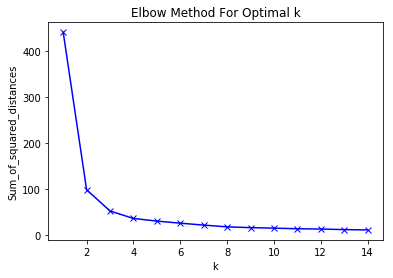

In [26]:
#https://blog.cambridgespark.com/how-to-determine-the-optimal-number-of-clusters-for-k-means-clustering-14f27070048f
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(x_train)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

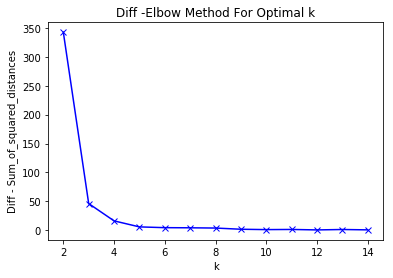

In [27]:
Diff_Sum_of_squared_distances = pd.Series(Sum_of_squared_distances)
Diff_Sum_of_squared_distances = Diff_Sum_of_squared_distances.diff().abs()#.diff().abs()
Diff_Sum_of_squared_distances.dropna(inplace=True)


plt.plot(K[1:], Diff_Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Diff - Sum_of_squared_distances')
plt.title('Diff -Elbow Method For Optimal k')
plt.show()

#Diff_Sum_of_squared_distances

# exercise KMeans

## Clustering - Overview of clustering methods
#https://scikit-learn.org/stable/modules/clustering.html

## DBSCAN
#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

In [83]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=8).fit(x)#
y_pred = dbscan.labels_


cluster_center = dbscan.components_
cluster_center.shape
x.shape

(150, 4)

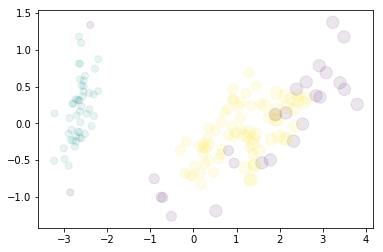

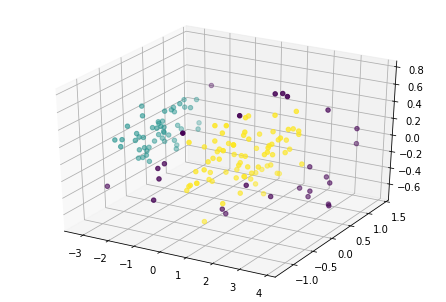

In [84]:
#check result using PCA

pca = PCA(n_components=2)
pca.fit(x)  
x_pca = pca.transform(x)

pca_cluster_center = PCA(n_components=2)
pca_cluster_center.fit(cluster_center)  
pca_cluster_center = pca_cluster_center.transform(cluster_center)

size_y = (y + 1)*50

#2D plot
plt.scatter(x_pca[:,0],x_pca[:,1],c=y_pred,s = size_y,alpha=0.1)
#plt.scatter(x_pca[:,0],x_pca[:,1],c=y,alpha=0.01, edgecolor='black', linewidth=10,s=10)
#plt.scatter(pca_cluster_center[:,0],pca_cluster_center[:,1],s = 10,alpha=0.5, linewidth=100)
plt.show()

pca = PCA(n_components=3)
pca.fit(x)  
x_pca = pca.transform(x)

pca_cluster_center = PCA(n_components=3)
pca_cluster_center.fit(cluster_center)  
pca_cluster_center = pca_cluster_center.transform(cluster_center)

#3D plot
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x_pca[:,0],x_pca[:,1],x_pca[:,2],c=y_pred)#,s = size_y
#ax.scatter(x_pca[:,0],x_pca[:,1],x_pca[:,2],c=y,alpha=0.01, edgecolor='black', linewidth=10,s=10)
#plt.scatter(pca_cluster_center[:,0],pca_cluster_center[:,1],pca_cluster_center[:,2],alpha=0.5, linewidth=100)
plt.show()

In [85]:
y_pred

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  1,
        1,  1,  1, -1, -1, -1, -1, -1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
        1,  1,  1, -1,  1,  1, -1,  1,  1,  1, -1, -1, -1,  1,  1, -1, -1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1],
      dtype=int64)

# exercise DBSCAN

## GaussianMixture
#https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#examples-using-sklearn-mixture-gaussianmixture

In [71]:
from sklearn.mixture import GaussianMixture

gaussian_mixture = GaussianMixture(n_components=10).fit(x)#, covariance_type='full'
y_pred = gaussian_mixture.predict(x)


cluster_center = gaussian_mixture.means_
cluster_center.shape

(10, 4)

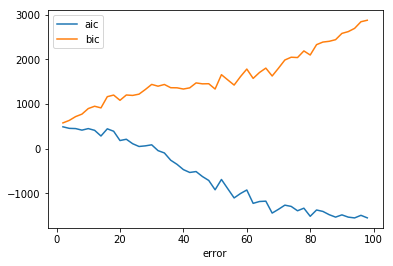

In [72]:
#https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html
aic_error = list()
bic_error = list()

start_ = 2
stop_ = 100
step_ = 2

for i in range(start_,stop_,step_):
    gaussian_mixture = GaussianMixture(n_components=i).fit(x)
    aic_error.append(gaussian_mixture.aic(x))
    bic_error.append(gaussian_mixture.bic(x))

plt.plot([i for i in range(start_,stop_,step_)],aic_error)
plt.plot([i for i in range(start_,stop_,step_)],bic_error)
plt.xlabel("iteration number")
plt.xlabel("error")
plt.legend(['aic',"bic"])

plt.show()

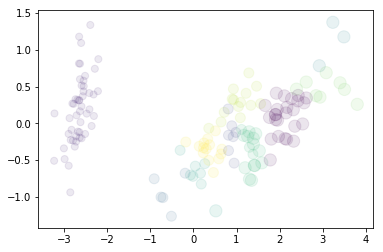

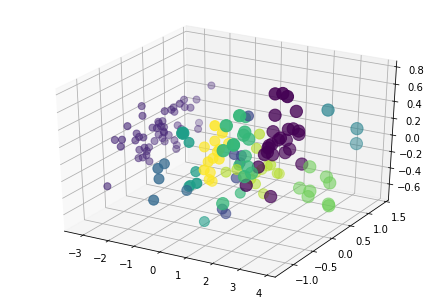

In [73]:
#check result using PCA

pca = PCA(n_components=2)
pca.fit(x)  
x_pca = pca.transform(x)

pca_cluster_center = PCA(n_components=2)
pca_cluster_center.fit(cluster_center)  
pca_cluster_center = pca_cluster_center.transform(cluster_center)

size_y = (y + 1)*50

#2D plot
plt.scatter(x_pca[:,0],x_pca[:,1],c=y_pred,s = size_y,alpha=0.1)
#plt.scatter(x_pca[:,0],x_pca[:,1],c=y,alpha=0.01, edgecolor='black', linewidth=10,s=10)
#plt.scatter(pca_cluster_center[:,0],pca_cluster_center[:,1],s = 50,alpha=0.5, linewidth=100)
plt.show()

pca = PCA(n_components=3)
pca.fit(x)  
x_pca = pca.transform(x)

pca_cluster_center = PCA(n_components=3)
pca_cluster_center.fit(cluster_center)  
pca_cluster_center = pca_cluster_center.transform(cluster_center)

#3D plot
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x_pca[:,0],x_pca[:,1],x_pca[:,2],c=y_pred,s = size_y)
#ax.scatter(x_pca[:,0],x_pca[:,1],x_pca[:,2],c=y,alpha=0.01, edgecolor='black', linewidth=10,s=10)
#plt.scatter(pca_cluster_center[:,0],pca_cluster_center[:,1],pca_cluster_center[:,2],alpha=0.5, linewidth=100)
plt.show()

# Hierarchical Clustering

## Hierarchical Clustering - dendrogram
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html

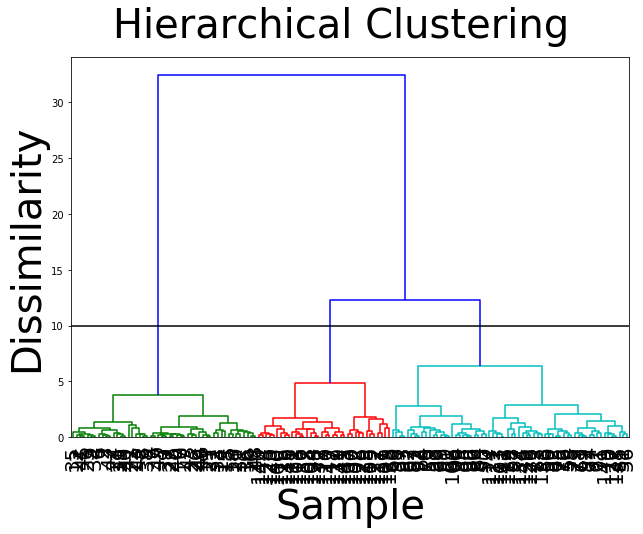

In [74]:
from scipy.cluster.hierarchy import dendrogram, linkage  
from sklearn.cluster import AgglomerativeClustering

linked = linkage(x, 'ward')
max_d = 10

plt.figure(figsize=(10, 7))  
dendrogram(linked,orientation='top'
           ,distance_sort='descending'
           ,show_leaf_counts=True,leaf_font_size = 20,color_threshold = max_d,truncate_mode='lastp',p=150)
plt.axhline(y=max_d, c='k')
plt.suptitle("Hierarchical Clustering", fontsize=40)
plt.xlabel("Sample",fontdict={'fontsize': 40})
plt.ylabel("Dissimilarity",fontdict={'fontsize': 40})
plt.show()  

# Hierarchical Clustering - AgglomerativeClustering
#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

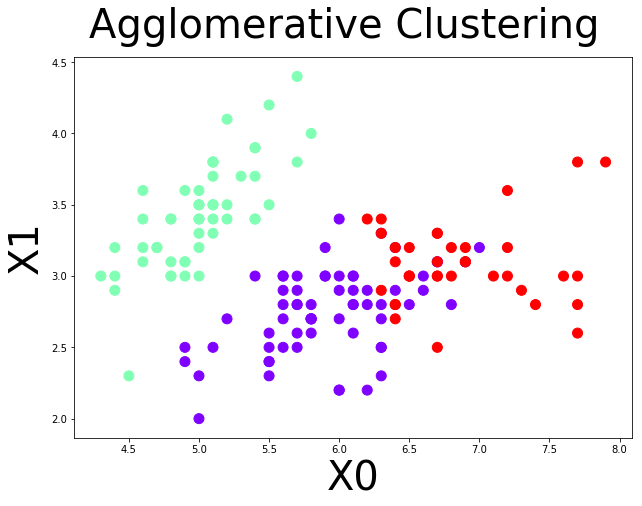

In [66]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
cluster.fit_predict(x)  

plt.figure(figsize=(10, 7))  
plt.scatter(x[:,0],x[:,1],s=100, c=cluster.labels_, cmap='rainbow') #'rainbow'
plt.suptitle("Agglomerative Clustering", fontsize=40)
plt.xlabel("X0",fontdict={'fontsize': 40})
plt.ylabel("X1",fontdict={'fontsize': 40}) 
plt.show() 